# New data
### In this file I wil try to apply some strategies and techniques to bit the new dataset

First, let's import the libraries

In [3]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

And load the data

In [4]:
data = pd.read_csv("Genotyped.csv", index_col='index')
data

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408290,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
2,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
3,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,1,0,1,0
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,1,1,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,1
595,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,0,0,0,1,0,1
596,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,1,1


In [5]:
output = pd.read_csv("Phenotypes.csv", index_col="index")
output

,V1,V2,V3,V4,average phenotypes
index,,,,,
0,1.671629,-1.727470,-1.890285,0.050916,-0.648708
1,-0.252703,0.409522,0.309386,-1.738759,0.155402
2,0.341815,-0.648626,-0.799559,-1.053569,-0.368790
3,0.785439,0.093949,0.570468,0.551757,0.483285
4,0.998318,-0.282481,1.618682,-0.114285,0.778173
...,...,...,...,...,...
594,-1.248504,1.419042,1.574549,1.659656,0.581695
595,-1.052126,0.082785,2.138355,0.554385,0.389671
596,-1.209974,0.451963,2.022570,1.848717,0.421519


In [6]:
X = data
y = output.iloc[:,-1]
X,y

(       wPt.0538  wPt.8463  wPt.6348  wPt.9992  wPt.2838  wPt.8266  wPt.1100  \
 index                                                                         
 0             0         1         1         1         1         0         1   
 1             1         1         1         1         1         0         1   
 2             1         1         1         1         1         0         1   
 3             0         1         1         1         1         0         1   
 4             0         1         1         1         1         0         1   
 ...         ...       ...       ...       ...       ...       ...       ...   
 594           1         1         1         1         1         0         1   
 595           0         1         1         1         1         0         1   
 596           0         1         1         1         1         1         1   
 597           1         0         1         1         1         0         1   
 598           1         1         1    

## Initial data visualization

<IPython.core.display.Javascript object>


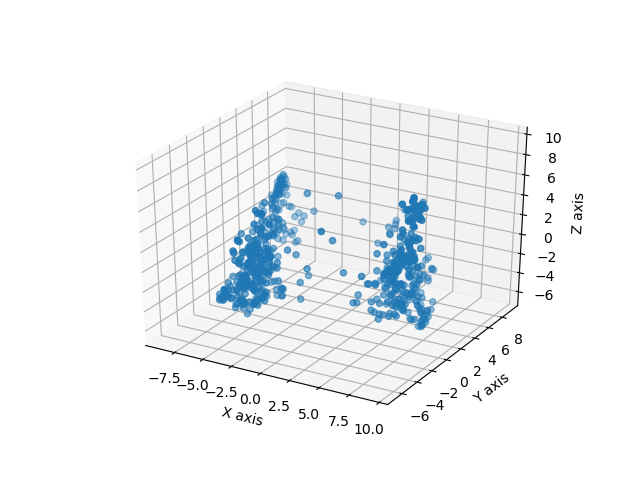

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

fig = plt.figure()
ax= plt.axes(projection='3d')

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:,2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

As we can see on the plot, data is formed into two groups or 'clouds'. Now, lets separate the data so that in each set we have one 'cloud'.

In [8]:
X_one = X[X_pca[:, 0] <= 1.5]
X_two = X[X_pca[:, 0] > 1.5]

In [9]:
X_one.head()

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408290,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443
index,,,,,,,,,,,,,,,,,,,,,
5,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,0,0,0,0,1,1
6,1,1,1,1,1,0,1,1,0,1,...,1,0,1,1,0,0,0,0,1,1
8,0,1,0,1,1,0,1,1,0,1,...,1,1,1,0,0,0,0,1,1,1
11,1,1,0,1,1,0,1,1,0,1,...,1,0,1,1,1,0,1,0,1,1
13,0,1,0,1,1,0,1,1,1,1,...,1,0,1,1,0,0,0,0,1,1


In [10]:
X_two.head()

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408290,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
2,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
3,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,1,0,1,0
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1


In [11]:
y_one = np.take(y, X_one.index)
y_one.head()

index
5     1.012035
6     0.119381
8    -1.564314
11    0.106392
13   -0.256002
Name: average phenotypes, dtype: float64

In [12]:
y_two = np.take(y, X_two.index)
y_two.head()

index
0   -0.648708
1    0.155402
2   -0.368790
3    0.483285
4    0.778173
Name: average phenotypes, dtype: float64

### Further data visualization
Let's make sure that our clound are well-separated

<IPython.core.display.Javascript object>


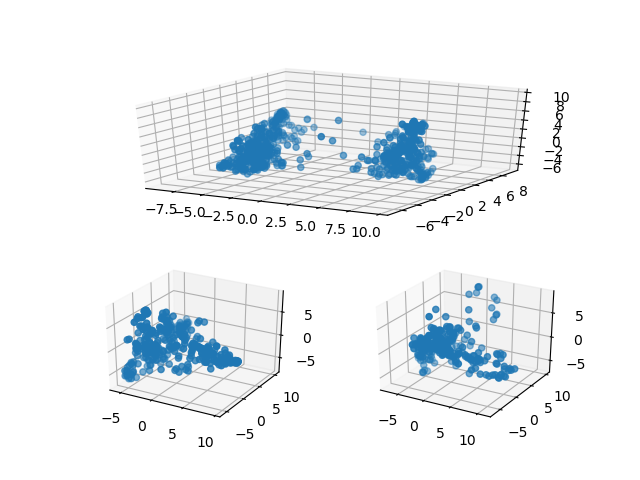

In [13]:
fig = plt.figure()

ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:,2])

ax = fig.add_subplot(2, 2, 3, projection='3d')

pca = PCA(n_components=3)
pca.fit(X_one)
X_one_pca = pca.transform(X_one)

ax.scatter3D(X_one_pca[:, 0], X_one_pca[:, 1], X_one_pca[:,2])

ax = fig.add_subplot(2, 2, 4, projection='3d')

pca.fit(X_two)
X_two_pca = pca.transform(X_two)

ax.scatter3D(X_two_pca[:, 0], X_two_pca[:, 1], X_two_pca[:,2])

### Now, let's add colors

<IPython.core.display.Javascript object>


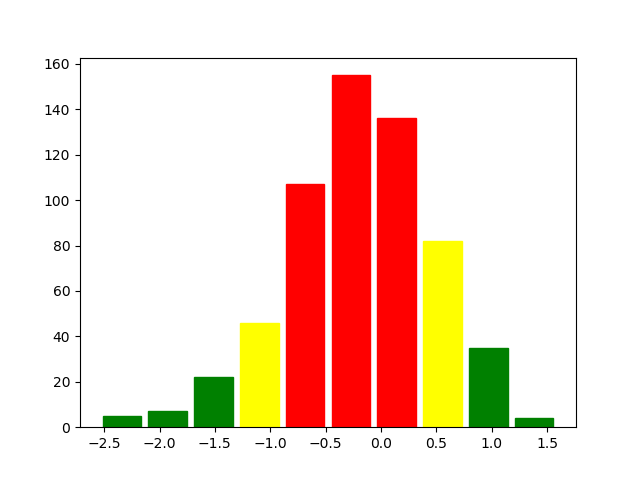

In [14]:
hist, bin_edges = np.histogram(y)
fig = plt.figure()
bars = plt.bar(bin_edges[:-1], hist, width=0.35)

for bar in bars:
    if bar.get_height() <= 45:
        bar.set_color('green')
    elif bar.get_height() <= 100:
        bar.set_color('yellow')
    elif bar.get_height() <= 200:
        bar.set_color('red')
        
plt.show()

### Let's introduce colors to the 3D graph
* Lets take the original grapg and create an additional feature X['color']

In [15]:
colors = []

for output in y:
    if output < -1:
        colors.append('green')
    elif output < 1:
        colors.append('yellow')
    elif output >= 1:
        colors.append('red')
        
colors = np.array(colors)

Now, as we have a color array, we can re-construct our graph.<br/>
!!! It worth noticing that we are applying a colors array with the original dataset size on an array that's been modified by PCA (which may have another size). Although, the graph has been constructed without any errors, I am not sure if we can trust these colors. But it seems okay...

<IPython.core.display.Javascript object>


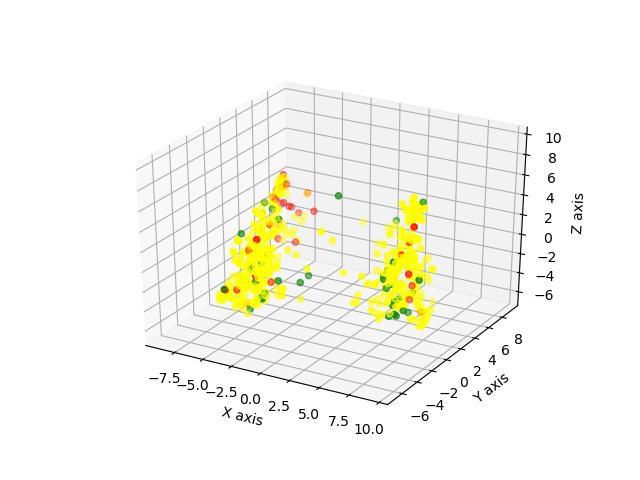

In [16]:
fig = plt.figure()
ax= plt.axes(projection='3d')

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=colors)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

As we can see, the output values are pretty much evenly spread along the graph, however there are more extreme values (red dots) on the left cloud (X_one).

### Now, lets apply the old code for each of the clounds and see what happenes

In [17]:
from sklearn.model_selection import train_test_split

split = 0.2 # use 20% of the data for testing.
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X_one, y_one, test_size=split, random_state=42)

In [68]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

classifier = XGBRegressor(objective ='reg:squarederror')
grid = {
    'n_estimators': [300, 400, 500],
    'max_depth' : [3],
    'learning_rate' : [0.01]
}

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_one_train, y_one_train)

best_parameters_one = gd_sr.best_params_
print(best_parameters_one)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [83]:
best_clf_one = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters_one['n_estimators'], 
                        max_depth=best_parameters_one['max_depth'], 
                        learning_rate=best_parameters_one['learning_rate'])

# has best set of parameters, now retrain on all training data.

best_clf_one.fit(X_one_train,y_one_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [84]:
y_one_pred = best_clf_one.predict(X_one_test)
y_one_pred_tr = best_clf_one.predict(X_one_train)

### How did first model do?

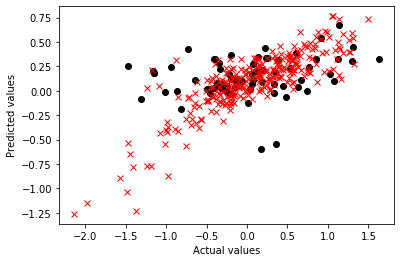

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_one_test, y_one_pred, 'o', color='black')
plt.plot(y_one_train,y_one_pred_tr, 'x', color='red')
plt.show()

In [79]:
from sklearn.metrics import r2_score
# we use r2 because we are doing regression, not classification
print('Training set:',r2_score(y_one_train,y_one_pred_tr))
print('Test set:',r2_score(y_one_test,y_one_pred))

NameError: name 'y_one_pred_tr' is not defined

#### The model actually performed worse than the original one

### Training the second model...

In [18]:
from sklearn.model_selection import train_test_split

split = 0.2 # use 20% of the data for testing.
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(X_two, y_two, test_size=split, random_state=42)

In [92]:
classifier = XGBRegressor(objective ='reg:squarederror')
grid = {
    'n_estimators': [300, 400],
    'max_depth' : [4, 5, 6],
    'learning_rate' : [0.01]
}

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_two_train, y_two_train)

best_parameters_two = gd_sr.best_params_
print(best_parameters_two)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


In [93]:
best_clf_two = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters_two['n_estimators'], 
                        max_depth=best_parameters_two['max_depth'], 
                        learning_rate=best_parameters_two['learning_rate'])

# has best set of parameters, now retrain on all training data.

best_clf_two.fit(X_two_train,y_two_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [94]:
y_two_pred = best_clf_two.predict(X_two_test)
y_two_pred_tr = best_clf_two.predict(X_two_train)

### How did the second model do?

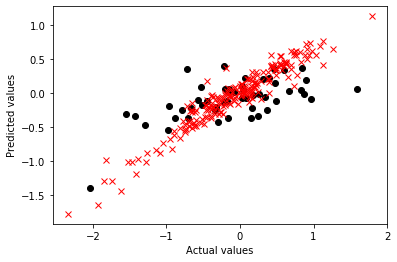

In [95]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_two_test, y_two_pred, 'o', color='black')
plt.plot(y_two_train,y_two_pred_tr, 'x', color='red')
plt.show()

In [96]:
# we use r2 because we are doing regression, not classification
print('Training set:',r2_score(y_two_train,y_two_pred_tr))
print('Test set:',r2_score(y_two_test,y_two_pred))

Training set: 0.8539623629510886
Test set: 0.34878161258043094


The second model performed better that the original one

### K-Nearest Neighbors

#### Applies to all set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

In [82]:
# Import the estimator object
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score

# Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=200, weights='distance', metric='euclidean', n_jobs=-1)
# Use the training data to train the estimator
knn.fit(X_train, y_train)

knn_train_mse = r2_score(y_pred=knn.predict(X_train), y_true=y_train)
knn_test_mse = r2_score(y_pred=knn.predict(X_test), y_true=y_test)

In [83]:
knn_test_mse

0.022302805356066102

<IPython.core.display.Javascript object>


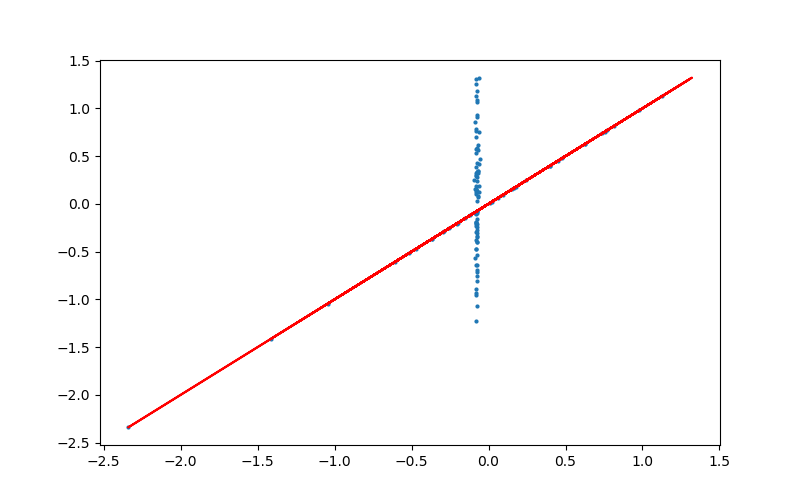

In [99]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')

#### Applied to left cloud

In [94]:
# Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=200, weights='distance', metric='euclidean', n_jobs=-1)
# Use the training data to train the estimator
knn.fit(X_one_train, y_one_train)

knn_train_mse = r2_score(y_pred=knn.predict(X_one_train), y_true=y_one_train)
knn_test_mse = r2_score(y_pred=knn.predict(X_one_test), y_true=y_one_test)

In [95]:
knn_test_mse

-0.012540356989862333

<IPython.core.display.Javascript object>


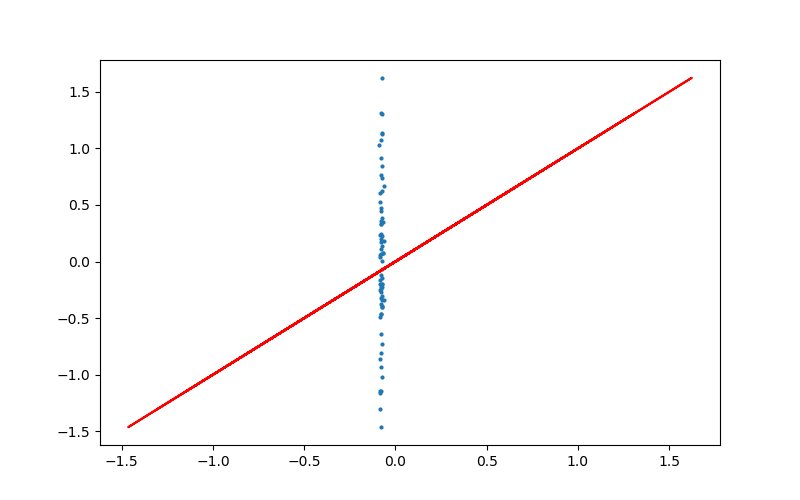

In [101]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_one_test), y_one_test, s=4)
ax.plot(y_one_test, y_one_test, color='red')

#### Applies to right cloud

In [96]:
# Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=200, weights='distance', metric='euclidean', n_jobs=-1)
# Use the training data to train the estimator
knn.fit(X_two_train, y_two_train)

knn_train_mse = r2_score(y_pred=knn.predict(X_two_train), y_true=y_two_train)
knn_test_mse = r2_score(y_pred=knn.predict(X_two_test), y_true=y_two_test)

In [97]:
knn_test_mse

0.015872482192227033

<IPython.core.display.Javascript object>


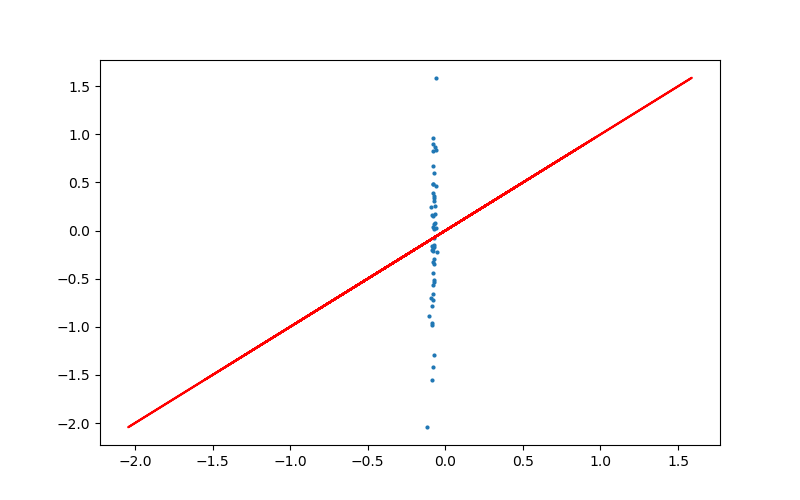

In [102]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_two_test), y_two_test, s=4)
ax.plot(y_two_test, y_two_test, color='red')

### Lasso Model

#### Applies to all set

In [88]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_train_mse = r2_score(y_pred=lasso.predict(X_train), y_true=y_train)
lasso_test_mse = r2_score(y_pred=lasso.predict(X_test), y_true=y_test)

In [89]:
lasso_test_mse

-0.01724762399833435

<IPython.core.display.Javascript object>


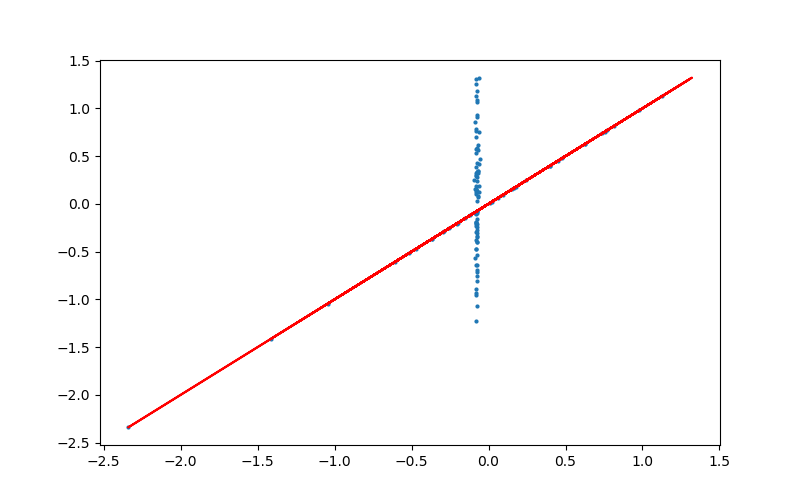

In [103]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')

#### Applies to left cloud

In [90]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_one_train, y_one_train)

lasso_train_mse = r2_score(y_pred=lasso.predict(X_one_train), y_true=y_one_train)
lasso_test_mse = r2_score(y_pred=lasso.predict(X_one_test), y_true=y_one_test)

In [91]:
lasso_test_mse

-0.008917155187898818

<IPython.core.display.Javascript object>


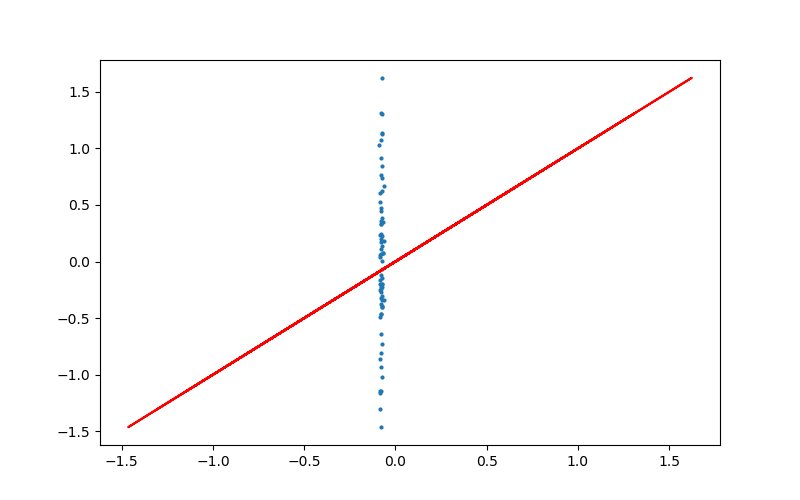

In [104]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_one_test), y_one_test, s=4)
ax.plot(y_one_test, y_one_test, color='red')

#### Applied to right cloud

In [92]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_two_train, y_two_train)

lasso_train_mse = r2_score(y_pred=lasso.predict(X_two_train), y_true=y_two_train)
lasso_test_mse = r2_score(y_pred=lasso.predict(X_two_test), y_true=y_two_test)

In [93]:
lasso_test_mse

-0.00042092491614331706

<IPython.core.display.Javascript object>


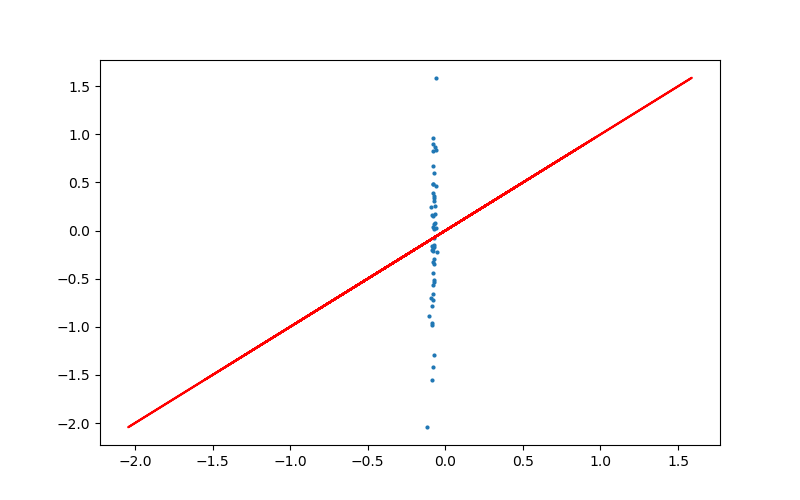

In [105]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_two_test), y_two_test, s=4)
ax.plot(y_two_test, y_two_test, color='red')